# 2D Tensor Basis Vector Field Example

This notebook demonstrates:
1. Sampling J=100 points on a 10x10 grid with spacing delta_x=0.1
2. Creating a tensor basis with one center at the origin
3. Extracting columns of the (J, D, D) matrix as vector fields
4. Computing divergence with signed components

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from entra import VectorSampler, TensorBasis, divergence, divergence_components, verify_divergence_free_symmetric

## Step 1: Sample J=100 points on a 10x10 grid

In [2]:
# Parameters
num_points_per_dim = 10  # 10 points per dimension
delta_x = 0.1            # Grid spacing in both x and y
sigma = 0.7 * delta_x    # Sigma for tensor basis

# Create sampler centered at origin
sampler = VectorSampler(
    center=[0.0, 0.0],
    delta_x=delta_x,
    num_points_per_dim=num_points_per_dim,
    distribution="uniform"
)

# Sample the grid points
eval_points = sampler.sample()
J = sampler.J
grid_shape = sampler.num_points_per_dim

print(f"Grid: {num_points_per_dim} x {num_points_per_dim} = {J} points")
print(f"Grid shape: {grid_shape}")
print(f"delta_x = {delta_x}")
print(f"sigma = {sigma}")
print(f"\neval_points shape: {eval_points.shape}  (J, D)")

Grid: 10 x 10 = 100 points
Grid shape: (10, 10)
delta_x = 0.1
sigma = 0.06999999999999999

eval_points shape: (100, 2)  (J, D)


## Step 2: View the sampled points

Let's see the actual coordinates of all 100 sampled points.

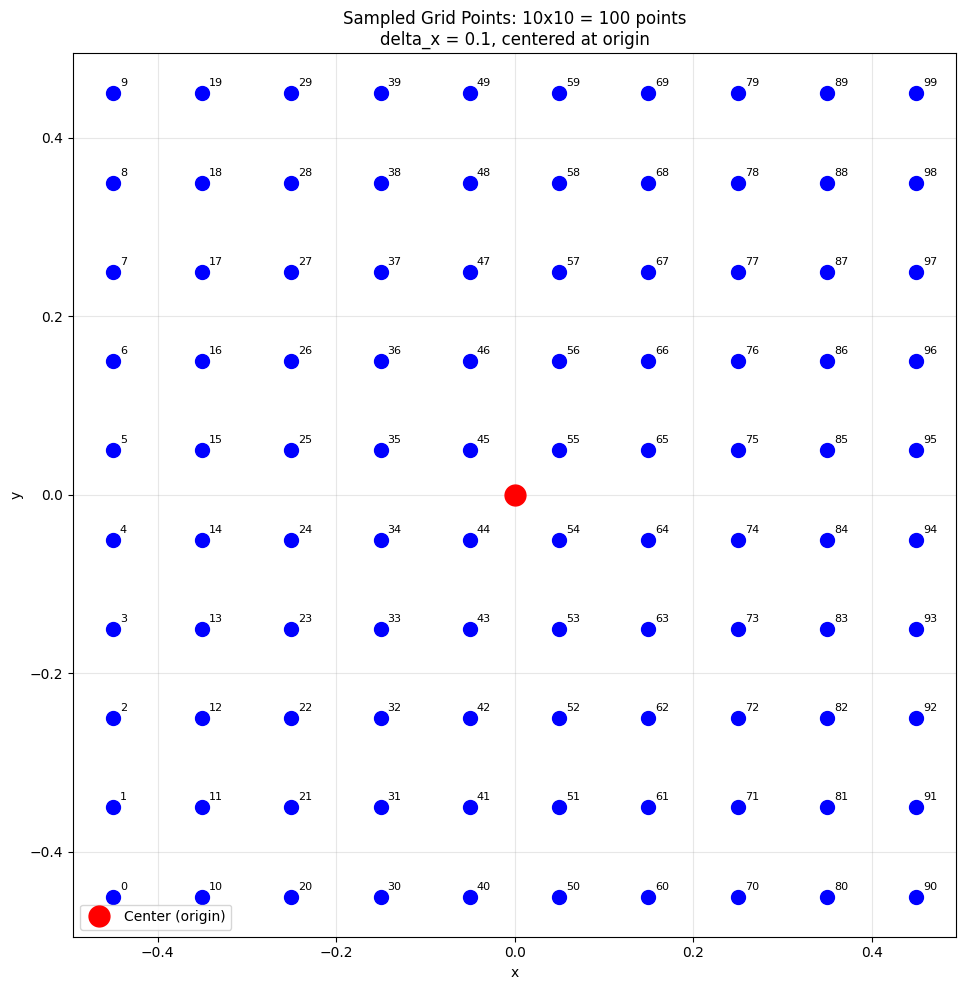


Grid extent:
  x: [-0.45, 0.45]
  y: [-0.45, 0.45]


In [4]:
# Visualize the grid with point indices
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all points
ax.scatter(eval_points[:, 0], eval_points[:, 1], c='blue', s=100, zorder=2)

# Label each point with its index
for j in range(J):
    ax.annotate(f'{j}', (eval_points[j, 0], eval_points[j, 1]), 
                textcoords="offset points", xytext=(5, 5), fontsize=8)

# Mark the center (origin)
ax.plot(0, 0, 'ro', markersize=15, zorder=3, label='Center (origin)')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Sampled Grid Points: {num_points_per_dim}x{num_points_per_dim} = {J} points\n'
             f'delta_x = {delta_x}, centered at origin')
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
ax.legend()
plt.tight_layout()
plt.show()

# Print grid extent
print(f"\nGrid extent:")
print(f"  x: [{eval_points[:, 0].min():.2f}, {eval_points[:, 0].max():.2f}]")
print(f"  y: [{eval_points[:, 1].min():.2f}, {eval_points[:, 1].max():.2f}]")

## Step 3: Create TensorBasis with L=1 center at origin

In [5]:
# L=1 center at origin
centers = np.array([[0.0, 0.0]])
L = 1

tensor_basis = TensorBasis(centers, sigma=sigma)
print(f"TensorBasis: L={L} center, D=2 dimensions, sigma={sigma}")

TensorBasis: L=1 center, D=2 dimensions, sigma=0.06999999999999999


## Step 4: Evaluate tensor basis at all J points

In [6]:
# Evaluate tensor basis at all J points
Phi_full = tensor_basis.evaluate(eval_points)
print(f"Phi_full shape: {Phi_full.shape}  (J, L, D, D)")

# Since L=1, squeeze to get (J, D, D)
Phi = Phi_full[:, 0, :, :]  # (J, D, D) = (100, 2, 2)
print(f"Phi shape: {Phi.shape}  (J, D, D)")

# Show the 2x2 matrix at a few sample points
print("\nSample Phi matrices at specific points:")
for j in [0, 44, 45, 54, 55, 99]:  # corners and center
    print(f"\nj={j} at ({eval_points[j, 0]:+.2f}, {eval_points[j, 1]:+.2f}):")
    print(f"  Phi = [[{Phi[j, 0, 0]:+.4f}, {Phi[j, 0, 1]:+.4f}],")
    print(f"         [{Phi[j, 1, 0]:+.4f}, {Phi[j, 1, 1]:+.4f}]]")

Phi_full shape: (100, 1, 2, 2)  (J, L, D, D)
Phi shape: (100, 2, 2)  (J, D, D)

Sample Phi matrices at specific points:

j=0 at (-0.45, -0.45):
  Phi = [[-0.0000, +0.0000],
         [+0.0000, -0.0000]]

j=44 at (-0.05, -0.05):
  Phi = [[+60.0123, +62.5128],
         [+62.5128, +60.0123]]

j=45 at (-0.05, +0.05):
  Phi = [[+60.0123, -62.5128],
         [-62.5128, +60.0123]]

j=54 at (+0.05, -0.05):
  Phi = [[+60.0123, -62.5128],
         [-62.5128, +60.0123]]

j=55 at (+0.05, +0.05):
  Phi = [[+60.0123, +62.5128],
         [+62.5128, +60.0123]]

j=99 at (+0.45, +0.45):
  Phi = [[-0.0000, +0.0000],
         [+0.0000, -0.0000]]


## Step 5: Extract columns as vector fields

The 2x2 matrix at each point:
$$\Phi = \begin{pmatrix} \Phi_{00} & \Phi_{01} \\ \Phi_{10} & \Phi_{11} \end{pmatrix}$$

- **Column 0**: $V_0 = [\Phi_{00}, \Phi_{10}]^T$
- **Column 1**: $V_1 = [\Phi_{01}, \Phi_{11}]^T$

In [7]:
# Extract columns
V0 = Phi[:, :, 0]  # Column 0: (J, D) = (100, 2)
V1 = Phi[:, :, 1]  # Column 1: (J, D) = (100, 2)

print(f"V0 shape: {V0.shape}  (J, D)")
print(f"V1 shape: {V1.shape}  (J, D)")

# Show vector field values at sample points
print("\nVector field V0 = [Phi_00, Phi_10] at sample points:")
for j in [44, 45, 54, 55]:  # near center
    print(f"  j={j} at ({eval_points[j, 0]:+.2f}, {eval_points[j, 1]:+.2f}): "
          f"V0 = [{V0[j, 0]:+.4f}, {V0[j, 1]:+.4f}]")

V0 shape: (100, 2)  (J, D)
V1 shape: (100, 2)  (J, D)

Vector field V0 = [Phi_00, Phi_10] at sample points:
  j=44 at (-0.05, -0.05): V0 = [+60.0123, +62.5128]
  j=45 at (-0.05, +0.05): V0 = [+60.0123, -62.5128]
  j=54 at (+0.05, -0.05): V0 = [+60.0123, -62.5128]
  j=55 at (+0.05, +0.05): V0 = [+60.0123, +62.5128]


## Step 6: Compute divergence with signed components

Divergence: $\text{div}(V_0) = \frac{\partial \Phi_{00}}{\partial x} + \frac{\partial \Phi_{10}}{\partial y}$

Both terms are **signed** (can be + or -). The divergence-free property means they cancel.

In [8]:
# Compute divergence (signed sum)
div_V0 = divergence(V0, dx=delta_x, grid_shape=grid_shape)
div_V1 = divergence(V1, dx=delta_x, grid_shape=grid_shape)

print(f"div_V0 shape: {div_V0.shape}  (J,)")
print(f"div_V1 shape: {div_V1.shape}  (J,)")

# Get individual signed components
comp_V0 = divergence_components(V0, dx=delta_x, grid_shape=grid_shape)
comp_V1 = divergence_components(V1, dx=delta_x, grid_shape=grid_shape)

print(f"\ncomp_V0 shape: {comp_V0.shape}  (J, D)")
print(f"  comp_V0[:, 0] = dPhi_00/dx (signed)")
print(f"  comp_V0[:, 1] = dPhi_10/dy (signed)")

div_V0 shape: (100,)  (J,)
div_V1 shape: (100,)  (J,)

comp_V0 shape: (100, 2)  (J, D)
  comp_V0[:, 0] = dPhi_00/dx (signed)
  comp_V0[:, 1] = dPhi_10/dy (signed)


In [9]:
# Statistics
print("\nStatistics:")
print("=" * 50)
print(f"dPhi_00/dx:  min={comp_V0[:, 0].min():+.6f}, max={comp_V0[:, 0].max():+.6f}")
print(f"dPhi_10/dy:  min={comp_V0[:, 1].min():+.6f}, max={comp_V0[:, 1].max():+.6f}")
print(f"div(V0):     min={div_V0.min():+.6f}, max={div_V0.max():+.6f}")

# Verify sum
print(f"\nVerify: comp_V0[:, 0] + comp_V0[:, 1] == div_V0? {np.allclose(comp_V0[:, 0] + comp_V0[:, 1], div_V0)}")


Statistics:
dPhi_00/dx:  min=-299.403437, max=+299.403437
dPhi_10/dy:  min=-434.391470, max=+434.391470
div(V0):     min=-173.314747, max=+173.314747

Verify: comp_V0[:, 0] + comp_V0[:, 1] == div_V0? True


## Step 7: Visualize

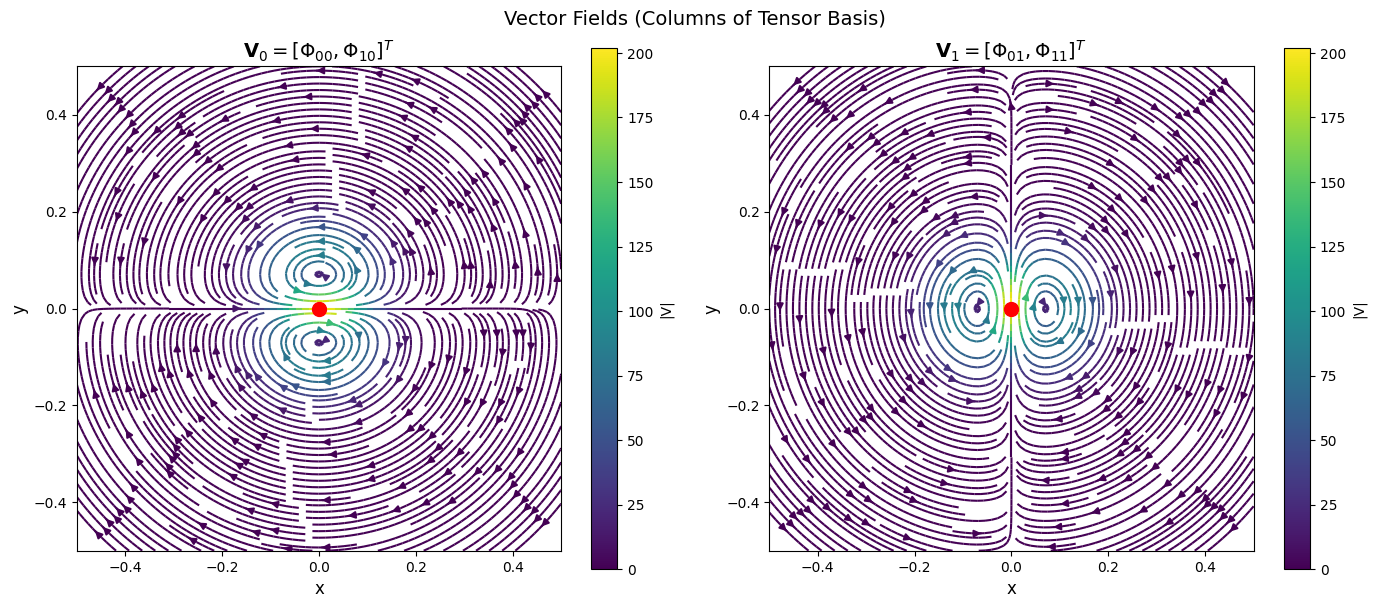

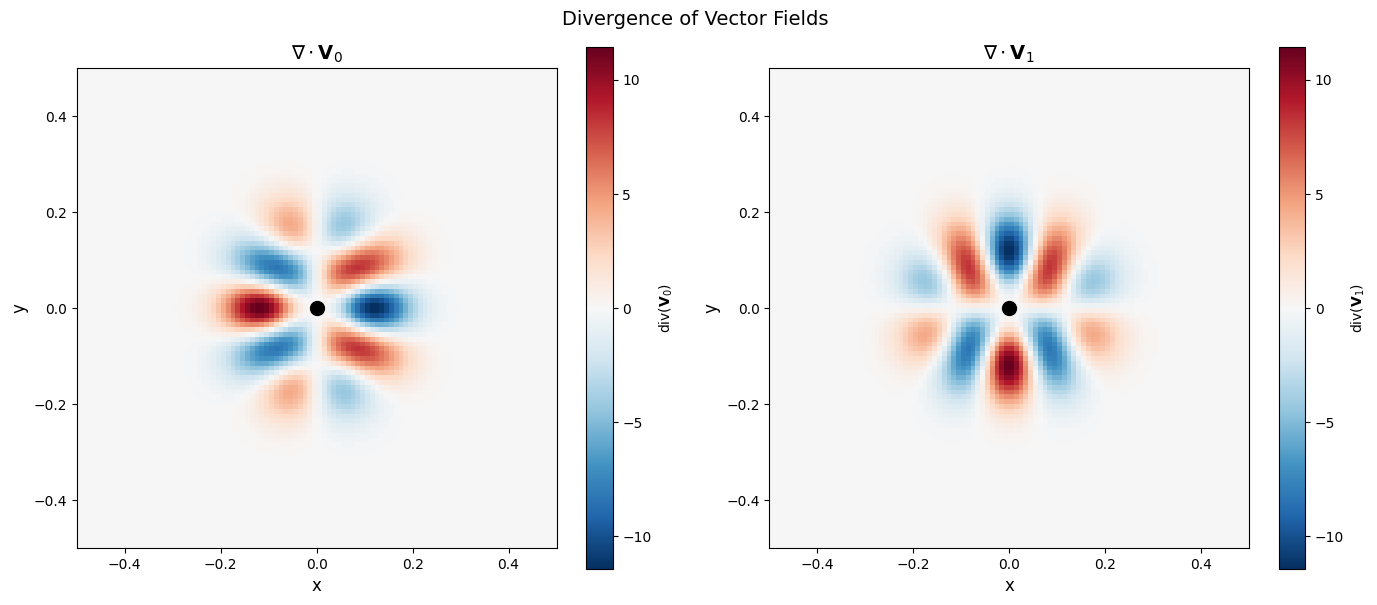

Divergence-Free Verification (Symmetric Cancellation)

V0:
  Positive divergence sum: +3.0474e+03
  Negative divergence sum: -3.0474e+03
  Total sum:               -1.5750e-12
  Cancellation ratio:      100.00%
  Divergence-free:         True

V1:
  Positive divergence sum: +3.0474e+03
  Negative divergence sum: -3.0474e+03
  Total sum:               -1.6015e-12
  Cancellation ratio:      100.00%
  Divergence-free:         True


In [10]:
# PLOT 1: Vector Fields (streamlines)

n_fine = 100
x_fine = np.linspace(-0.5, 0.5, n_fine)
y_fine = np.linspace(-0.5, 0.5, n_fine)
xx_fine, yy_fine = np.meshgrid(x_fine, y_fine, indexing='ij')
eval_fine = np.column_stack([xx_fine.ravel(), yy_fine.ravel()])

Phi_fine = tensor_basis.evaluate(eval_fine)[:, 0, :, :]
V0_fine = Phi_fine[:, :, 0]
V1_fine = Phi_fine[:, :, 1]

V0_x = V0_fine[:, 0].reshape(n_fine, n_fine)
V0_y = V0_fine[:, 1].reshape(n_fine, n_fine)
V1_x = V1_fine[:, 0].reshape(n_fine, n_fine)
V1_y = V1_fine[:, 1].reshape(n_fine, n_fine)

mag0 = np.sqrt(V0_x**2 + V0_y**2)
mag1 = np.sqrt(V1_x**2 + V1_y**2)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

ax0 = axes[0]
strm0 = ax0.streamplot(x_fine, y_fine, V0_x.T, V0_y.T, 
                        color=mag0.T, cmap='viridis', density=2.5, linewidth=1.5)
ax0.plot(0, 0, 'ro', markersize=10)
ax0.set_xlim(-0.5, 0.5)
ax0.set_ylim(-0.5, 0.5)
ax0.set_xlabel('x', fontsize=12)
ax0.set_ylabel('y', fontsize=12)
ax0.set_title(r'$\mathbf{V}_0 = [\Phi_{00}, \Phi_{10}]^T$', fontsize=14)
ax0.set_aspect('equal')
plt.colorbar(strm0.lines, ax=ax0, label='|V|')

ax1 = axes[1]
strm1 = ax1.streamplot(x_fine, y_fine, V1_x.T, V1_y.T,
                        color=mag1.T, cmap='viridis', density=2.5, linewidth=1.5)
ax1.plot(0, 0, 'ro', markersize=10)
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(-0.5, 0.5)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title(r'$\mathbf{V}_1 = [\Phi_{01}, \Phi_{11}]^T$', fontsize=14)
ax1.set_aspect('equal')
plt.colorbar(strm1.lines, ax=ax1, label='|V|')

plt.suptitle('Vector Fields (Columns of Tensor Basis)', fontsize=14)
plt.tight_layout()
plt.show()


# PLOT 2: Divergence of Vector Fields
dx_fine = x_fine[1] - x_fine[0]
grid_shape_fine = (n_fine, n_fine)

div_V0_fine = divergence(V0_fine, dx=dx_fine, grid_shape=grid_shape_fine).reshape(n_fine, n_fine)
div_V1_fine = divergence(V1_fine, dx=dx_fine, grid_shape=grid_shape_fine).reshape(n_fine, n_fine)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Use same color scale for both
vmax = max(np.abs(div_V0_fine).max(), np.abs(div_V1_fine).max())

ax0 = axes[0]
im0 = ax0.imshow(div_V0_fine.T, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower',
                  cmap='RdBu_r', vmin=-vmax, vmax=vmax)
ax0.plot(0, 0, 'ko', markersize=10)
ax0.set_xlabel('x', fontsize=12)
ax0.set_ylabel('y', fontsize=12)
ax0.set_title(r'$\nabla \cdot \mathbf{V}_0$', fontsize=14)
ax0.set_aspect('equal')
cbar0 = plt.colorbar(im0, ax=ax0)
cbar0.set_label(r'div($\mathbf{V}_0$)')

ax1 = axes[1]
im1 = ax1.imshow(div_V1_fine.T, extent=[-0.5, 0.5, -0.5, 0.5], origin='lower',
                  cmap='RdBu_r', vmin=-vmax, vmax=vmax)
ax1.plot(0, 0, 'ko', markersize=10)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title(r'$\nabla \cdot \mathbf{V}_1$', fontsize=14)
ax1.set_aspect('equal')
cbar1 = plt.colorbar(im1, ax=ax1)
cbar1.set_label(r'div($\mathbf{V}_1$)')

plt.suptitle('Divergence of Vector Fields', fontsize=14)
plt.tight_layout()
plt.show()

# Verify divergence-free via symmetric cancellation
print("Divergence-Free Verification (Symmetric Cancellation)")
print("=" * 60)
for name, V in [("V0", V0_fine), ("V1", V1_fine)]:
    is_free, stats = verify_divergence_free_symmetric(V, dx=dx_fine, grid_shape=grid_shape_fine)
    print(f"\n{name}:")
    print(f"  Positive divergence sum: {stats['positive_sum']:+.4e}")
    print(f"  Negative divergence sum: {stats['negative_sum']:+.4e}")
    print(f"  Total sum:               {stats['total_sum']:+.4e}")
    print(f"  Cancellation ratio:      {stats['cancellation_ratio']:.2%}")
    print(f"  Divergence-free:         {is_free}")

## Summary

| Object | Shape | Description |
|--------|-------|-------------|
| `eval_points` | (100, 2) | 100 sampled points on 10x10 grid |
| `Phi` | (100, 2, 2) | 2x2 matrix at each of the 100 points |
| `V0` | (100, 2) | Column 0 as vector field |
| `comp_V0` | (100, 2) | Signed divergence components |
| `div_V0` | (100,) | Total divergence at each point |